# Title: Red wine quality prediction

### Preamble

Red wine quality dataset which has one table with 12 columns and 1599 rows.

In this project, I have used some attributes to predict the quality of the wine. I have used Linear regression and Decision tree regressor to predict the exact quality values,and found out the Root Mean Squared Errors of both the models to know which one works best. Then, I have used Random Forest classifier to predict whether the wine is good, bad or medium, and found out the accuracy of the model.

### Data Understanding

Data source: Kaggle

Data Name: Red Wine Quality

Data URL: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/notebooks

File type: csv file

There are 11 input variables namely,


'fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' , 'free sulfur dioxide' , 'total sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol'

There is one output variable for the regression model namely,

'quality'

There is one output variable for the classification model namely, which I have added later on.

All the columns are useful for the prediction model.

### Data Understanding

In [226]:
import pandas as pd

In [227]:
wine_df = pd.read_csv("/Users/antarachansarkar/Desktop/winequality-red.csv")

In [228]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [229]:
shape=wine_df.shape

Number of rows

In [230]:
shape[0]

1599

Number of columns

In [231]:
shape[1]

12

Column Names:

In [232]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

To find datatype of data in every column, Memory usage and Non-null value counts:

In [233]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [234]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preparation

To find the number of null values in each column:

In [235]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since there are no null values in any column, and the datatype is float in each column, even if there are values like 0.00, we do not need to drop those.

In [236]:
from matplotlib import pyplot as plt

In [237]:
import seaborn as sns
%matplotlib inline

We have divided quality values into 3 different categories namely, Good, Medium, Bad to visualize and get a better understanding that how are the input variables affecting the quality of the red wine. Furthermore, we can also use these to make a classification model. We have used this data in Random Forest Classifier.

In [238]:
quality = wine_df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Medium")

In [239]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine_df,category],axis=1)


In [240]:
#After addition of Category column
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Medium


Medium    1319
Good       217
Bad         63
Name: category, dtype: int64

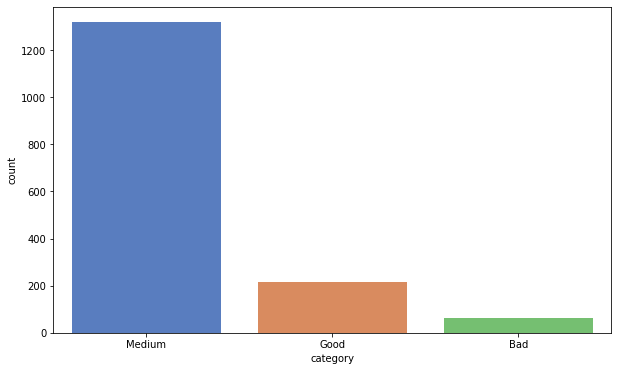

In [241]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

Here, using heatmap, we have created a visual representation of correlations between different pair of attributes of the dataset.

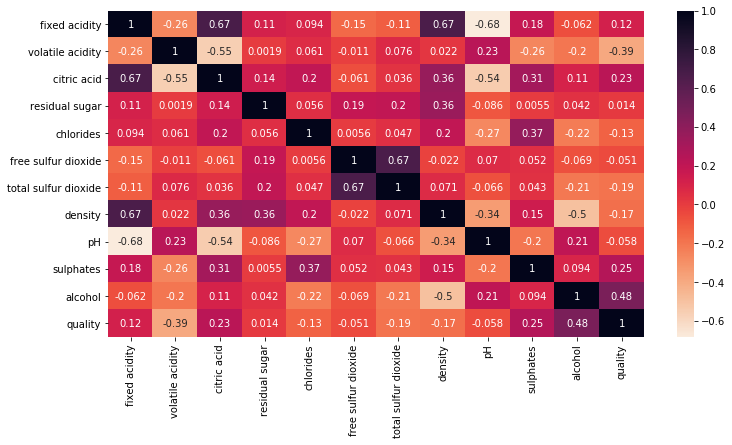

In [242]:
plt.figure(figsize=(12,6))
sns.heatmap(wine_df.corr(),annot=True, cmap='rocket_r')

In [243]:
X= wine_df.iloc[:,:-1].values
y=wine_df.iloc[:,-1].values

### Data

#### For Regression models

X is a 2D matrix with  shape 1599 x 11

In [244]:
print(X)
X.shape

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


(1599, 11)

In [245]:
print(y)

[5 5 5 ... 6 5 6]


#### For Classification Model

In [246]:
X2= data.iloc[:,:-2].values
y2=data.iloc[:,-1].values

### Data Modeling

#### For Regression models

Splitting data into train and test.

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

#### For Classification Model

In [248]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2,random_state=0)

#### Linear Regression Model

In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [250]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
y_p=model.predict(X_test)

In [252]:
model.coef_

array([ 4.12835075e-02, -1.14952802e+00, -1.77927063e-01,  2.78700036e-02,
       -1.87340739e+00,  2.68362616e-03, -2.77748370e-03, -3.15166657e+01,
       -2.54486051e-01,  9.24040106e-01,  2.67797417e-01])

In [253]:
model.intercept_

34.998710628721405

Root Mean Square Error

In [254]:
RMSE=sqrt(mean_squared_error(y_true=y_test,y_pred=y_p))

In [255]:
RMSE

0.6200574149384271

#### Decision Tree Regressor

In [256]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [257]:
y_pr=reg.predict(X_test)

Root Mean Square Error

In [258]:
RMSE=sqrt(mean_squared_error(y_true=y_test, y_pred=y_pr))
RMSE

0.6748700633226226

#### Random Forest Classifier

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train2, y_train2)
pred_rfc = rfc.predict(X_test2)

In [261]:
print(classification_report(y_test2, pred_rfc,zero_division='warn'))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.67      0.60      0.63        30
      Medium       0.91      0.97      0.94       277

    accuracy                           0.89       320
   macro avg       0.53      0.52      0.52       320
weighted avg       0.85      0.89      0.87       320



### Evaluation and Analysis

First, we have used 2 regression models and obtained 2 different RMSE values in both:

For linear regression, RMSE = 0.6200574149384271
For Decision tree regressor, RMSE = 0.6748700633226226

The results show that linear regression proves to be better for quality prediction.

Second, we have used Random Forest classifier and achieved the accuracy of 89%.

### Use of the project

Wine has evolved as part of life, culture and diet since time immemorial. As an enduring cultural symbol of fine life, the role of wine has evolved over time, changing from an important source of nutrition to a cultural complement to food and conviviality compatible with a healthy lifestyle.

The regression model helps us to predict the quality of wine as a numerical value, and hence gives us the exact value. 

The classification model helps us to predict whether a wine is good, bad or medium. This helps in deciding the price of the wine. Taste changes when quality does and hence different recipes, different occasions demand different quality wines. So, the quality prediction helps.